### K-Means
#### Amaç, gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmaktır.

##### Küme sayısı belirlenir.
##### Rastgele k merkez seçilir.
##### Her gözlem için k merkezlere uzaklıklar hesaplanır.
##### Her gözlem en yakın olduğu merkeze yani kümeye atanır.
##### Atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır.
##### Bu işlem belirlenen bir iterasyon adedince tekrar edilir ve küme içi hata kareler toplamları toplamının(total within-cluster variation) minimum olduğu durumdaki gözlemlerin kümelenme yapısı nihai kümeleme olarak seçilir.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


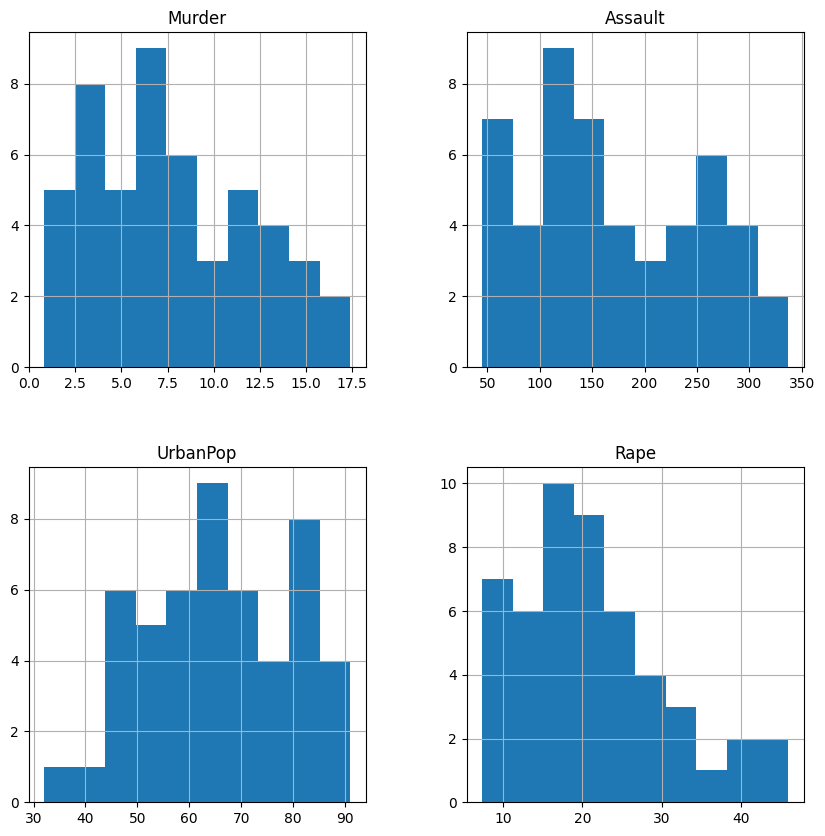

In [10]:
df.hist(figsize = (10, 10));

In [11]:
kmeans = KMeans(n_clusters = 4)

In [12]:
k_fit = kmeans.fit(df)

In [13]:
k_fit.n_clusters

4

In [14]:
k_fit.cluster_centers_

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

In [15]:
k_fit.labels_

array([0, 0, 0, 3, 0, 3, 1, 0, 0, 3, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 3, 0,
       2, 0, 3, 1, 1, 0, 2, 3, 0, 0, 0, 2, 1, 3, 3, 1, 3, 0, 2, 3, 3, 1,
       2, 3, 3, 2, 2, 3])

#### Visualization of Clusters 

In [18]:
k_means = KMeans(n_clusters=2).fit(df)

In [19]:
clusters = k_means.labels_
clusters

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

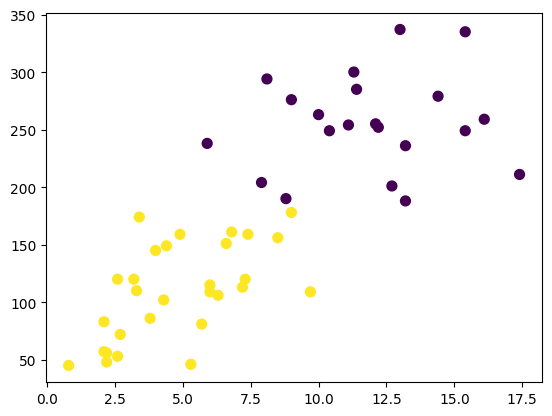

In [21]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=clusters, s=50, cmap="viridis");

In [23]:
centers = k_means.cluster_centers_
centers

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

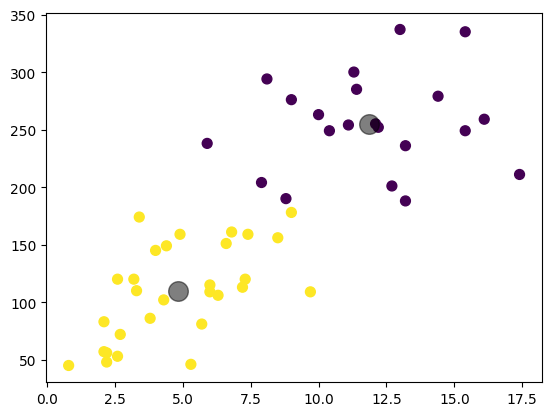

In [27]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=clusters, s=50, cmap="viridis");
plt.scatter(centers[:,0], centers[:,1], c="black", s=200, alpha=0.5);

#### Optimum Cluster Number

##### Elbow Method

In [28]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [29]:
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)

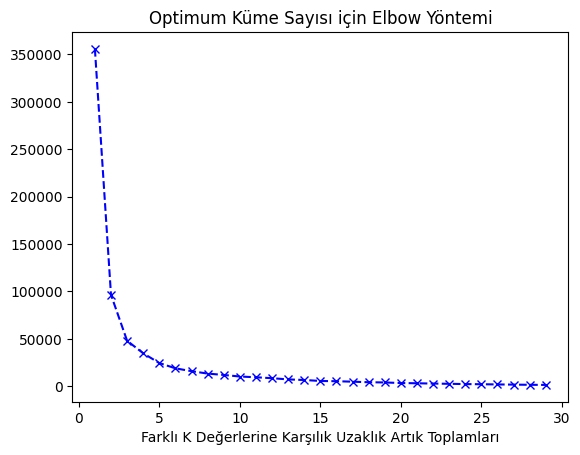

In [31]:
plt.plot(K, ssd, "bx--")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme Sayısı için Elbow Yöntemi");

In [32]:
!pip install yellowbrick

     ------------------------------------ 282.6/282.6 kB 645.4 kB/s eta 0:00:00


In [33]:
from yellowbrick.cluster import KElbowVisualizer

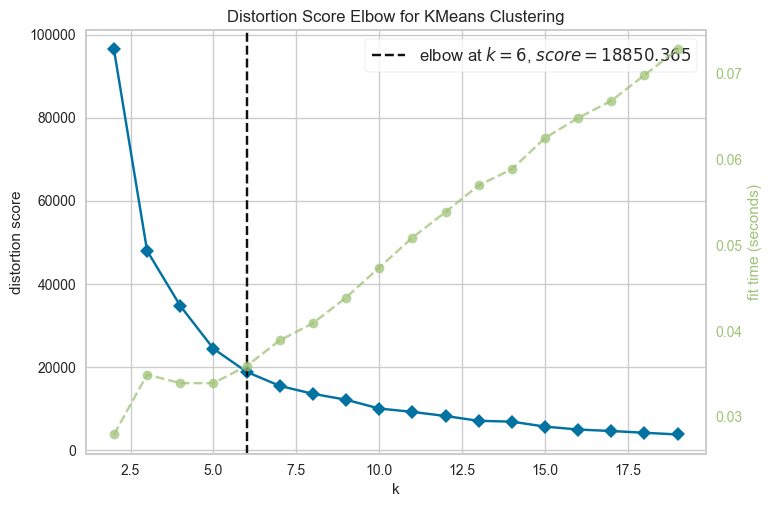

In [35]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2,20))
visu.fit(df)
visu.poof();

In [42]:
kmeans = KMeans(n_clusters=4).fit(df)

In [43]:
clusters = kmeans.labels_

In [44]:
pd.DataFrame({"States": df.index, "Clusters": clusters})

,States,Clusters
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,3
4,California,1
5,Colorado,3
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,3


In [45]:
df["Cluster_No"] = clusters
df

,Murder,Assault,UrbanPop,Rape,Cluster_No
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,3
